In [95]:
#!/usr/bin/env python3

# Taken from: https://stackoverflow.com/a/64165414/2857070
# Dumps the color palette as a file that can be #included to raylib
# Requires defining a MAKE_COLOR(r, g, b, a) macro before including

import io
import argparse
import textwrap
from typing import List
import numpy as np
from scipy.interpolate import pchip_interpolate

In [96]:
import matplotlib.pyplot as plt

def plot_colors(ys, rs, bs, gs, as_):
    height, width = 1, 1
    NSAMPLES = len(rs)
    rgba = np.dstack((rs, gs, bs, as_)).reshape(-1, 4)
    plt.bar(np.arange(NSAMPLES), height, width, color=rgba)
    plt.title("Color scale")
    plt.plot(np.arange(NSAMPLES), ys)
    plt.plot(np.arange(NSAMPLES), rs, color='red')
    plt.plot(np.arange(NSAMPLES), gs, color='green')
    plt.plot(np.arange(NSAMPLES), bs, color='blue')
    plt.show()

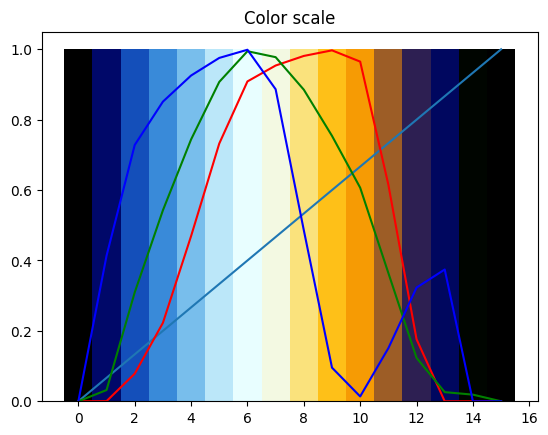

In [115]:
def interpolate_color_palette(num_levels: int) -> None:
    # fmt: off
    X_OBSERVED: List[float] = [0, 0.0625, 0.16, 0.42, 0.6425, 0.8575, 0.92875, 1.0]
    R_OBSERVED: List[float] = [0, 0     , 32  , 237   , 255   , 0   , 0      , 0]
    G_OBSERVED: List[float] = [0, 7     , 107 , 255   , 170   , 7   , 5      , 0]
    B_OBSERVED: List[float] = [0, 100   , 203 , 255   , 0     , 100 , 0      , 0]
    # fmt: on
    start, end = min(X_OBSERVED), max(X_OBSERVED)
    xs_interp = np.linspace(start, end, num=num_levels)
    r_interp = pchip_interpolate(X_OBSERVED, R_OBSERVED, xs_interp)
    g_interp = pchip_interpolate(X_OBSERVED, G_OBSERVED, xs_interp)
    b_interp = pchip_interpolate(X_OBSERVED, B_OBSERVED, xs_interp)
    return xs_interp, r_interp/255, g_interp/255, b_interp/255, np.ones(num_levels)

NSAMPLES = 16
ys, rs, gs, bs, as_ = interpolate_color_palette(NSAMPLES)

plot_colors(ys, rs, bs, gs, as_)

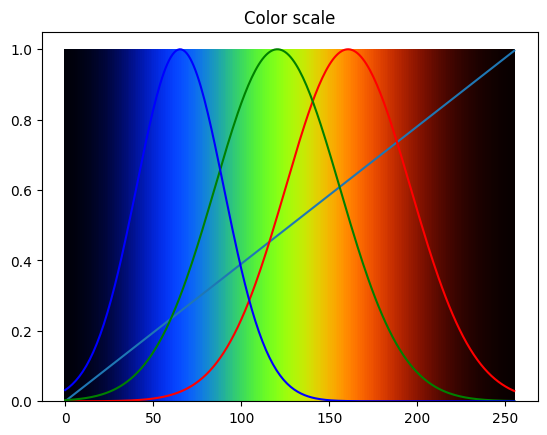

In [118]:
def guassian(xs, mu, sigma):
    return np.exp(-((xs - mu)/sigma)**2)

def gaussian_color_palette(num_levels):
    r_mu, r_sig = (num_levels * 160/255,num_levels *  50/255)
    g_mu, g_sig = (num_levels * 120/255,num_levels *  50/255)
    b_mu, b_sig = (num_levels * 65/255, num_levels * 35/255)
    xs = np.arange(num_levels)
    rs = guassian(xs, r_mu, r_sig)
    gs = guassian(xs, g_mu, g_sig)
    bs = guassian(xs, b_mu, b_sig)
    return xs/num_levels, rs, gs, bs, np.ones(num_levels)


NSAMPLES = 256
ys, rs, gs, bs, as_ = gaussian_color_palette(NSAMPLES)
plot_colors(ys, rs, bs, gs, as_)